In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import operator

In [11]:
def opener(file , permissions):
    with open(file , permissions) as f:
        f1 = f.readlines()
        f.close
        return(f1)

##takes is a line number for a conversation and outputs a graph of the emotions of the 
##2 speakers over the course of the conversation
##If speaker 1 takes an extra turn, I added another point of the same emotion for speaker 2 at the end

def speaker_emotion(conversation):
    convo_list = dialog_text[conversation].split('__eou__')[:-1]
    emotion_list = dialog_emotion[conversation].split()
    emotion_list = list(map(int, emotion_list))
    speaker1 = emotion_list[::2]
    speaker2 = emotion_list[1::2]
    if len(speaker2)<len(speaker1):
        speaker2.append(speaker2[-1])
    
    convo_list1 = convo_list[::2]
    convo_list2 = convo_list[1::2]
    if len(convo_list2)<len(convo_list1):
        convo_list2.append(convo_list2[-1])
    
    ##TODO: make this more readable - put in a table?
    small_offset = 0.5
    for i in range(len(convo_list1)):
        plt.annotate(convo_list1[i], xy=(i+1, speaker1[i]+small_offset))
        plt.annotate(convo_list2[i], xy=(i+1, speaker2[i]+small_offset-0.25))
        small_offset -=0.5
        
    df = pd.DataFrame({'turn': range(1,len(speaker1)+1), 'emotion1': speaker1,'emotion2': speaker2})
    plt.plot('turn', 'emotion1', data=df,label='speaker1',marker='^')
    plt.plot('turn', 'emotion2', data=df,label='speaker2',marker='o')

    plt.ylabel('Emotions')
    plt.xlabel('Turns')
    plt.xticks(np.arange(1,len(convo_list1)+1,1))
    plt.yticks(np.arange(0,7,1),("no emotion","anger","disgust","fear","happiness","sadness","surprise"))
    
    print(convo_list)
    plt.legend()
    plt.show()
    

##takes an array of emotion scores and returns the change between the max and min emotion for each speaker
##TODO: Benefits going from surprise to non-emotion - fix this?
def emotional_volatility_max_min(emotion_list):
    delta = max(emotion_list)-min(emotion_list)
    return(delta)

##takes an array of emotion scores and returns percentage of volatility as defined by the number of different emotions
##felt by a speaker over the number of total emotions felt
##TODO: Remove zero scores - benefits no change
def emotional_volatility_flux(emotion_list):
    if emotion_list != None:    
        vola_score = float(len(set(emotion_list)))/float(len(emotion_list))
        return vola_score
    
##takes an array of emotion scores and returns percentage of volatility as defined by the number of changes in emotions
##felt by a speaker over the number of total emotions felt
def emotional_volatility_steps(emotion_list):
    vola_count = 0
    if emotion_list != None and len(emotion_list) > 1:    
        for i in range(len(emotion_list)-1):
            if emotion_list[i]!=emotion_list[i+1]:
                vola_count += 1
    return vola_count

In [12]:

##open the files
dialog_act = opener('dialogues_act.txt','r')

dialog_emotion = opener('dialogues_emotion.txt','r')

dialog_text = opener('dialogues_text.txt','r')

dialog_topic = opener('dialogues_topic.txt','r')

##get number of convesations
num_convos = len(dialog_text)

In [13]:
counter = -1
delta_list1 = []
delta_list2 = []
delta_list3 = []
delta_list4 = []
delta_list5 = []
delta_list6 = []


for i in dialog_emotion:
    counter += 1
    emotion_list = i.split()
    emotion_list = list(map(int, emotion_list))
    speaker1 = emotion_list[::2]
    speaker2 = emotion_list[1::2]
    delta_list1.append(emotional_volatility_max_min(speaker1))
    delta_list2.append(emotional_volatility_max_min(speaker2))
    
    delta_list3.append(emotional_volatility_flux(speaker1))
    delta_list4.append(emotional_volatility_flux(speaker2))

    delta_list5.append(emotional_volatility_steps(speaker1))
    delta_list6.append(emotional_volatility_steps(speaker2))
    
dl1 = np.array(delta_list1)
dl2 = np.array(delta_list2)

indices1 = np.where(dl1 == max(delta_list1))[0]
indices2 = np.where(dl2 == max(delta_list2))[0]
set1 = list(set(indices1).union(indices2))

dl3 = np.array(delta_list3)
dl4 = np.array(delta_list4)
indices3 = np.where(dl3 == min(delta_list3))[0]
indices4 = np.where(dl4 == min(delta_list4))[0]
set3 = list(set(indices3).union(indices4))


dl5 = np.array(delta_list5)
dl6 = np.array(delta_list6)
indices5 = np.where(dl5 == max(delta_list5))[0]
indices6 = np.where(dl6 == max(delta_list6))[0]
set5 = list(set(indices5).union(indices6))


print(set5)

[9424, 3794, 3266, 2159]


['What should I get Uncle Teddy ? ', ' You could get him a tie . ', " Are you kidding ? That's the stupidest gift one can buy . I don't want to get a tie . ", ' Why not ? ', " Everybody gets men ties for Christmas . It's too boring . Everybody buys either ties or sweaters . I want a more unique gift . ", ' Well , you can buy him a pet iguana then . ', " That's a cool idea . At least it would be a surprise.But I'm afraid he wouldn't take care of it . ", ' He would think you were crazy , Caroline . ', ' Yes . An iguana is too strange for a gift , and a tie is too normal.So I have to find something halfway between . ', ' How much do you want to spend ? ', ' Well , he was very good to me.He helped me edit my essay for the scholarship contest.So I want to spend at least 75 dollars . ', ' Alright , I have an idea.You know he carries that conservative-looking briefcase every day . ', ' Yes . ', " Well , he isn't a lawyer , so I don't think he needs to have a briefcase like that . ", ' What sh

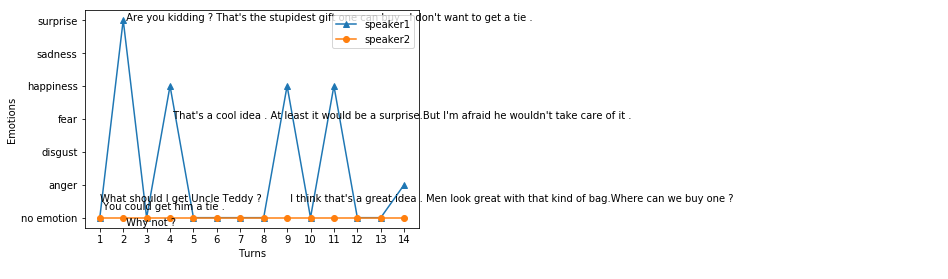

In [16]:
##Take the convo ID from previous cell and place it here to see the convo and graph
speaker_emotion(3266)

In [ ]:
####QUESTION 2

In [61]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier

##open the files
dialogues_train = opener('train/dialogues_train.txt','r')
dialogues_emotion_train = opener('train/dialogues_emotion_train.txt','r')
dialogues_test = opener('test/dialogues_test.txt','r')
dialogues_emotion_test = opener('test/dialogues_emotion_test.txt','r')
dialogues_validation = opener('validation/dialogues_validation.txt','r')
dialogues_emotion_validation = opener('validation/dialogues_emotion_validation.txt','r')

In [110]:
##takes a conversation and returns a dataframe with the speaker and compound sentiment value 
##for each sentence in the conversation

##TODO: Use this in the predictive model
def convo_sentiment(conversation_list):
    all_convo = []
    all_posorneg = []
    for i in range(len(conversation_list)):
        convo_list = conversation_list[i].split('__eou__')[:-1]
        all_convo.append(item for item in convo_list)
        if len(convo_list)%2 == 1:
            speaker_list = [1,2]*int((len(convo_list)/2))+[1]
        else:
            speaker_list = [1,2]*int((len(convo_list)/2))
        sid = SentimentIntensityAnalyzer()
        sentiment_list = []
        posorneg = []
        for sentence in convo_list:
            ss = sid.polarity_scores(sentence)
            sentiment_list.append(ss['compound'])
            if ss['compound']>0:
                posorneg.append('pos')
            elif ss['compound']<0:
                posorneg.append('neg')
            else:
                posorneg.append('neu')
        all_posorneg.append(item for item in posorneg)
#     d = {'speaker':speaker_list,'sentence': convo_list, 'sentiment': sentiment_list,'pos/neg':posorneg}
#     df = pd.DataFrame(data=d)
    return(list(zip(convo_list,posorneg)))

convo = convo_sentiment(dialogues_train)
all_words = set(word.lower() for passage in convo for word in word_tokenize(passage[0]))
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in convo]
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()


Most Informative Features


'pos'

In [115]:
##testing
for test in dialogues_test:
    for test_sentence in test.split('__eou__')[:-1]:
        test_sent_features = {word.lower(): (word in word_tokenize(test_sentence.lower())) for word in all_words}
        print(classifier.classify(test_sent_features))

pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos


pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos


pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos


pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos
pos


In [82]:
convo_list = []
next_sent = []
current_emotion = []
next_emotion = []
for i in range(len(dialogues_train)):
    split_convo = dialogues_train[i].split('__eou__')[:-1]
    for j in split_convo:
        convo_list.append(j)
    for k in range(len(split_convo)):
        try:
            next_sent.append(split_convo[k+1])
        except:
            next_sent.append("")
    for l in dialogues_emotion_train[i].split():
        current_emotion.append(l)
    for m in range(len(dialogues_emotion_train[i].split())):
        try:
            next_emotion.append(dialogues_emotion_train[i].split()[m+1])
        except:
            next_emotion.append("")

d = {'current sentence':convo_list,'next sentence': next_sent,'current emotion':current_emotion,'next_emotion':next_emotion}
train = pd.DataFrame(data=d)

convo_list = []
next_sent = []
current_emotion = []
next_emotion = []
for i in range(len(dialogues_test)):
    split_convo = dialogues_test[i].split('__eou__')[:-1]
    for j in split_convo:
        convo_list.append(j)
    for k in range(len(split_convo)):
        try:
            next_sent.append(split_convo[k+1])
        except:
            next_sent.append("")
    for l in dialogues_emotion_test[i].split():
        current_emotion.append(l)
    for m in range(len(dialogues_emotion_test[i].split())):
        try:
            next_emotion.append(dialogues_emotion_test[i].split()[m+1])
        except:
            next_emotion.append("")

d = {'current_sentence':convo_list,'next_sentence': next_sent,'current_emotion':current_emotion,'next_emotion':next_emotion}
test = pd.DataFrame(data=d)

convo_list = []
next_sent = []
current_emotion = []
next_emotion = []
for i in range(len(dialogues_validation)):
    split_convo = dialogues_validation[i].split('__eou__')[:-1]
    for j in split_convo:
        convo_list.append(j)
    for k in range(len(split_convo)):
        try:
            next_sent.append(split_convo[k+1])
        except:
            next_sent.append("")
    for l in dialogues_emotion_validation[i].split():
        current_emotion.append(l)
    for m in range(len(dialogues_emotion_validation[i].split())):
        try:
            next_emotion.append(dialogues_emotion_validation[i].split()[m+1])
        except:
            next_emotion.append("")

d = {'current_sentence':convo_list,'next_sentence': next_sent,'current_emotion':current_emotion,'next_emotion':next_emotion}
validate = pd.DataFrame(data=d)

train['Type'] = 'Train'
test['Type'] = 'Test'
validate['Type'] = 'Validate'
fullData = pd.concat([train,test,validate],axis=0)

